# Simple coin flip exercise

You have a coin that when flipped ends up head with probability $p$ and ends up tail with probability $1−p$. The value of $p$ is unknown.

Flipping the coin $\bf{n}$ times you end up with $\bf{k}$ heads. The objective of this exercise is to estimate the probability distribution of $p$ using this data.

## Import librairies

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.special as sc
from scipy.stats import beta     # beta probability distribution function

## Parameters of the exercise

In [3]:
k,n = 100,140 # number of heads and trials

## Bayesian treatment: mathematical approach

We will see that, for this particular exercice, it is actually straightforward to access p. Here, p is not a value, it's a distribution and to compute it we start from the Bayes rule:

$$
P(p|data) = \frac{P(data | p) P(p)}{P(data)},
$$

where $P(data | p)$ is given by the Binomial distribution which determines the probability of observing k "heads" in  n flip when the probability of success (head result) is given by p:

$$
P(data|p) = P(k|p,n) = \binom nk p^k (1-p)^{n-k}, \,\,\, \text{with the binomial coefficient: } \binom nk = \frac{n!}{k! (n-k)!}.
$$


Now, for the prior distribution $P(p)$, a very convenient choice for this scenario (also known as the conjugate prior of the binomial) is the <a href="https://en.wikipedia.org/wiki/Beta_distribution#Shapes">Beta distribution</a>, $Beta(p|a,b)$ defined as:

$$
Beta(p|a,b) =  \frac{1}{B(a,b)} p^{a-1}(1-p)^{b-1}
$$

where $B$ is the <a href="https://en.wikipedia.org/wiki/Beta_function">beta function</a> (not to be mistaken with the beta distribution !) and is a normalization constant to ensure that the probability integrates to 1.

---

With some simple calculations one can show that the posterior is of the same distribution family as the prior (Beta distribution), therefore the posterior distribution boils down to:

$$
P(p|data) = Beta(p|k+a, n - k + b)
$$

> ***Thus the posterior of this problem depends of the data (k and n) and the two parameters (a and b) that defines the prior !***

## 1. Prior and posterior distributions

The Beta distribution, for parameters $a$ and $b$, is given by the function ```beta.pdf(x,a,b)``` 

> a) Plot the shape of the prior for different values of a and b.
> 
> b) Choose and uniform prior (a=b=1) and plot the corresponding posterior distribution
>
> c) Now see how the posterior distribution changes if a 'peaked' prior (a=b=10, for example) is choosen instead


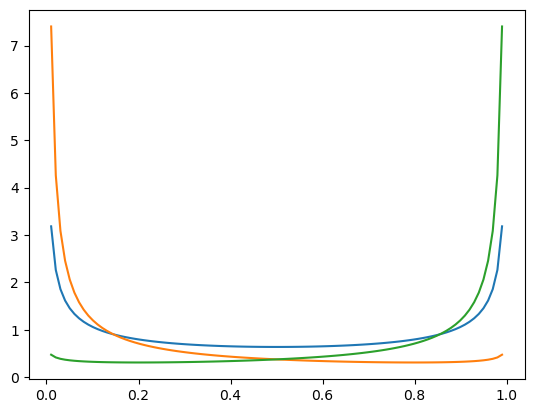

In [7]:
x = np.linspace(0,1,100)


a,b = 0.5,0.5
plt.plot(x,beta.pdf(x,a,b))


a,b = 0.2,0.8
plt.plot(x,beta.pdf(x,a,b))

# a gauche + grand en orange car b grand et inverse pour a a droite

a,b = 0.8,0.2
plt.plot(x,beta.pdf(x,a,b))
#vert




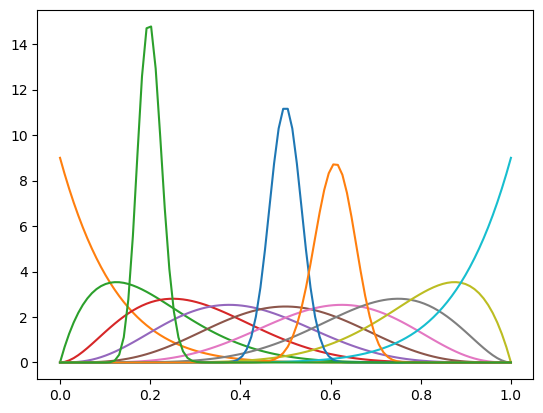

In [18]:
for i in range(100):
    plt.plot(x,beta.pdf(x,i,10-i))

a,b = 100,100
plt.plot(x,beta.pdf(x,a,b))

a,b = 70,45
plt.plot(x,beta.pdf(x,a,b))
# plus a est grand + ca pousse vers la drpite      
    
a,b = 45,180
plt.plot(x,beta.pdf(x,a,b))
# plus b est grand + ca pousse vers la gauche      

  
 

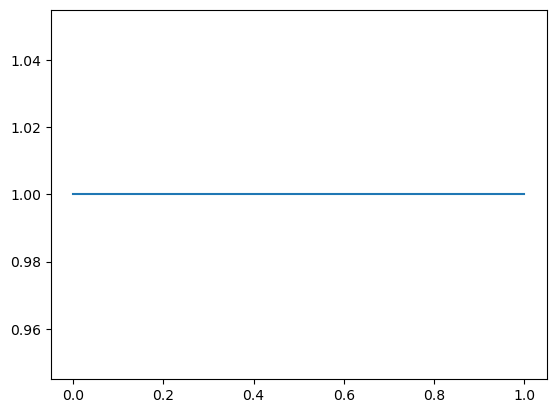

In [19]:
a,b = 1,1
plt.plot(x,beta.pdf(x,a,b))
# Ca fait une droite



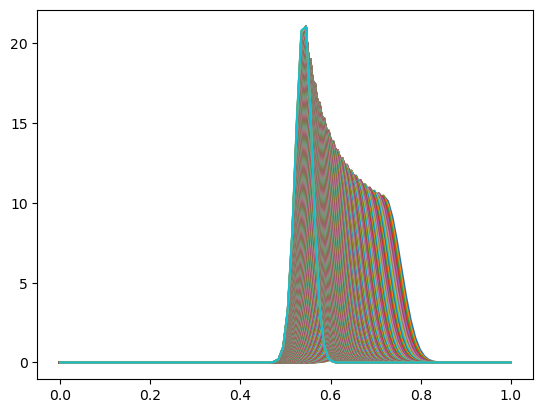

In [20]:
for i in range(300):
    plt.plot(x,beta.pdf(x, k+i , n-k+i))

## 2. Making predictions

In Bayesian inference we can use our probabilistic statements about the parameter from the posterior for making predictions. This is usually refered to as <a href="https://en.wikipedia.org/wiki/Posterior_predictive_distribution">posterior predictive distribution</a>. 


This is the distribution of unobserved data, conditioned on observed data and prior. It follows the idea as the marginal likelihood discussed above (which can be seen as a prior predictive distribution), namely that we want to evaluate new data on our fitted model. 

We can write the posterior predictive distribution for some new unseen data $x$, as the marginal of a distribution conditioned on observed data and prior:

$$
P(x |data) = \int P(x|p)P(p |data)dp
$$

where $data$ refers to our training data, and $x$ to some new unseen data.

For our beta-binomial model, we can write,

$$
P(j | m,k,n,a,b) = \int 
P(j|m,p)P(p |k,n,a,b)dp= \binom{m}{j} \frac{B(k+j+a,n-k+m-j+b)} {B(a+k,b+n-k)}
$$

where $j$ refers to the new number of Heads, $m$ to the new number of total flips, $k$ to the previous number of Heads, $n$ to the previous number of total flips, and $a$ and $b$ to our prior hyperparameters.


> a) Calculate the probability of flipping 2 heads out of 2 new flips
>
> b) Calculate the probability of flipping 3 heads out of 5 new flips

In summary, scipy.stats.beta.pdf is used for calculating the PDF of the beta distribution, while scipy.special.betaln is used for the natural logarithm of the beta function. They serve different purposes in statistics and mathematics. If you're working with the beta distribution and want to calculate probabilities, you'd typically use scipy.stats.beta.pdf. If you need the natural logarithm of the beta function for some other purpose, you'd use scipy.special.betaln



In [34]:
import math
from scipy.special import beta
a=1
b=1
j=2
m=2

(math.comb(m,j)*beta(k+j+a,n-k+m-j+b))  /  beta(k+a,n-k+b)

0.5073377326898455

In [35]:
a=1
b=1
j=3
m=5

(math.comb(m,j)*beta(k+j+a,n-k+m-j+b))  /  beta(k+a,n-k+b)

0.29517813564880574